In [218]:
# Outils essentiels
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats

# Outils d'intelligence artificielle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Visualisation
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

# Mesures de qualité
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [219]:
train_df = pds.read_csv('./train.csv', sep=",") # load a pandas dataframe from csv in current directory
test_df = pds.read_csv('./test.csv', sep=",")
data = pds.concat([train_df, test_df])

In [220]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [222]:
data["Age"].value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

In [223]:
train_df = train_df.drop(['PassengerId','Name','Cabin','Embarked','Ticket'], axis=1)
test_df = test_df.drop(['PassengerId','Name','Cabin','Embarked','Ticket'], axis=1)

In [224]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [216]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [188]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [217]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     object 
 10  Embarked     87 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [189]:
train_df.duplicated().sum()

40

In [190]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


In [197]:
train_df['Sex']=train_df['Sex'].replace({'female':1, 'male':2})

In [198]:
classes = train_df.Survived

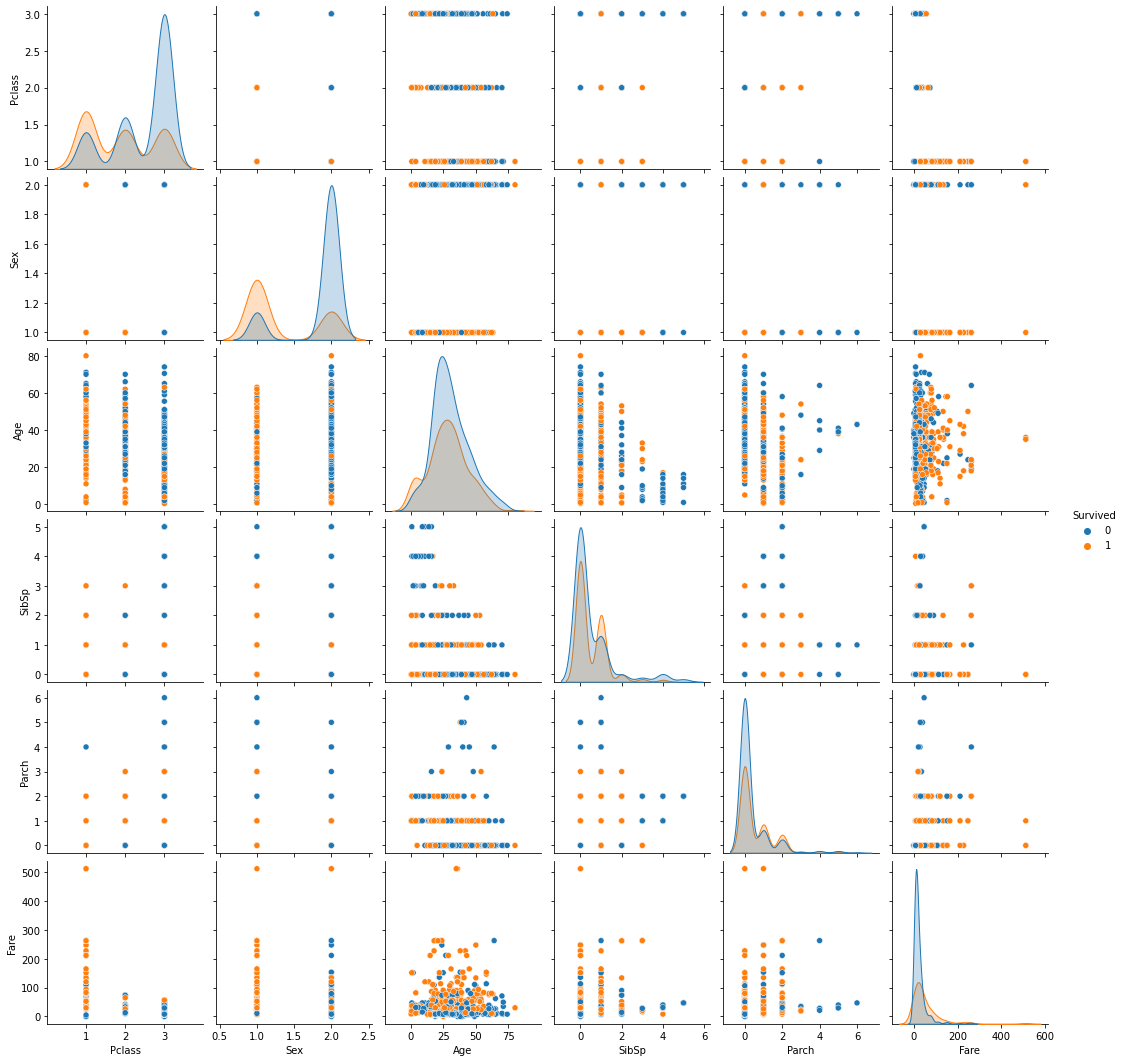

In [199]:
sns.pairplot(data=train_df, hue="Survived")

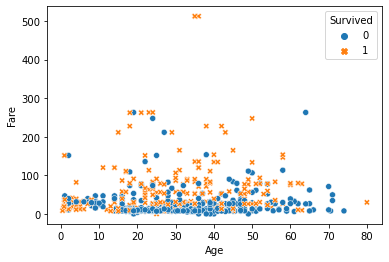

In [193]:
sns.scatterplot(data=train_df, x="Age", y="Fare", hue = classes, style=classes)
plt.show() 

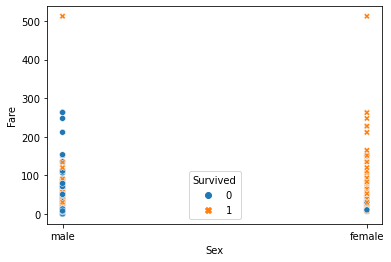

In [194]:
sns.scatterplot(data=train_df, x="Sex", y="Fare", hue = classes, style=classes)
plt.show() 

In [195]:
Fare= train_df.Fare
scaler = StandardScaler()
fare_scaled = scaler.fit_transform(Fare)

ValueError: Expected 2D array, got 1D array instead:
array=[  7.25    71.2833   7.925   53.1      8.05    51.8625  21.075   11.1333
  30.0708  16.7     26.55     8.05    31.275    7.8542  16.      29.125
  18.      26.      13.       8.0292  35.5     21.075   31.3875 263.
  27.7208  10.5     82.1708  52.       8.05    18.      11.2417   9.475
  21.      41.5792   7.8792  17.8     39.6875   7.8     76.7292  26.
  61.9792  10.5      7.2292  27.75    46.9      7.2292  80.      83.475
  27.9     10.5      8.1583   7.925    8.6625  10.5     46.9     73.5
  14.4542  56.4958   7.65    29.      12.475    9.       9.5     47.1
  10.5     15.85    34.375  263.       8.05     8.05     7.8542  61.175
  20.575    7.25    34.6542  63.3583  23.      26.       7.8958  77.2875
   8.6542   7.925    7.8958   7.65     7.8958  52.      14.4542   8.05
   9.825   14.4583   7.925    7.75    21.     247.5208  31.275   73.5
  30.0708  13.      77.2875  11.2417   7.1417   6.975    7.8958   7.05
  14.5     26.      13.      15.0458  26.2833  53.1      9.2167  79.2
   7.75    15.85     6.75    11.5     36.75     7.7958  34.375   26.
  13.      12.525   66.6      8.05    14.5     61.3792   7.7333   8.05
  16.1     15.75     7.775    8.6625  39.6875  20.525   27.9     56.4958
  33.5     29.125   11.1333   7.925   30.6958   7.8542  28.7125  13.
   0.      31.3875  39.      22.025   26.55    15.5      7.8958  13.
  13.       7.8542  26.      27.7208 146.5208   8.4042  13.       9.5
   6.4958   7.225    8.05    10.4625  15.85    18.7875   7.75    31.
   7.05    21.       7.25    13.     113.275    7.925   27.      76.2917
  10.5      8.05    13.       8.05    90.       9.35    10.5      7.25
  13.      83.475    7.775   13.5     31.3875  10.5     26.      26.25
  10.5     12.275   10.5      7.125    7.225   90.       7.775   14.5
  52.5542  26.      10.4625  26.55    16.1     20.2125  15.2458  86.5
 512.3292  26.      31.3875  79.65     0.      10.5     39.6875   7.775
 153.4625 135.6333   0.      19.5     29.7     77.9583   7.75    29.125
  20.25     7.75     7.8542   9.5      8.05     8.6625   9.5      7.8958
  13.       7.75    78.85    91.0792  12.875    8.85     7.8958   7.2292
 151.55   247.5208   0.     151.55   108.9     24.      56.9292  83.1583
 262.375   26.       7.8958  26.25     7.8542  26.      14.     164.8667
 134.5      7.25     7.8958  12.35    29.     135.6333   6.2375  13.
  20.525   57.9792  28.5    153.4625  18.      66.6    134.5      8.05
  35.5     26.     263.      13.      13.      13.      13.      13.
  15.9      8.6625   9.225    7.2292  17.8      9.5     55.      13.
  27.9     27.7208  14.4542   7.05     7.25    75.25    69.3     55.4417
   6.4958   8.05   135.6333  21.075    7.25   211.5      4.0125   7.775
 227.525   15.7417   7.925   52.      73.5     46.9     13.      12.
 120.       7.7958   7.925  113.275   16.7      7.7958   7.8542  26.
  10.5     12.65     7.925    8.05     9.825   15.85     8.6625  21.
   7.75    18.75     7.775   90.       7.925   32.5     13.      13.
  24.15     7.7333   7.875   14.4     20.2125  26.      26.       8.05
  26.55    26.       7.125   55.9    120.      34.375   18.75   263.
  10.5     26.25     9.5      7.775   13.      81.8583  19.5     26.55
  19.2583  30.5     27.75    27.75    89.1042   7.8958  26.55    10.5
  26.55     8.05    38.5     13.       7.05    26.55    19.2583   8.6625
  27.75    13.7917   9.8375  21.       7.0458   7.5208  12.2875  46.9
   8.05     9.5875  91.0792  90.      29.7      8.05    15.9      7.25
  30.5     49.5042   8.05    78.2667 151.55     7.7958   8.6625   7.75
   9.5875  86.5    108.9     26.      22.525   56.4958   7.75    26.2875
  59.4      7.4958  34.0208  10.5     26.       7.8958  93.5      7.8958
  57.9792   7.75    10.5      7.925   11.5     26.       7.2292   8.6625
  26.25    26.55   106.425   49.5     71.      31.275   31.275   26.
 106.425   26.      26.      20.525   36.75   110.8833  26.       7.225
   7.775   26.55    39.6     79.65    17.4      7.8958  13.5     24.15
   7.8958  21.075    7.8542  10.5     51.4792  26.3875   8.05    14.5
  13.      55.9      7.925   30.     110.8833  26.      40.125   79.65
  15.      79.2      8.05     7.125   78.2667   7.25    26.      24.15
   0.      56.9292  27.       8.05    26.55    15.55     7.8958  30.5
  41.5792 153.4625  31.275    8.05    65.      14.4     16.1     39.
  10.5     14.4542  52.5542  15.7417   7.8542  16.1     32.3208  12.35
  77.9583   7.8958  30.       7.0542  30.5     27.9     13.       7.925
  26.25    39.6875   7.8542  69.3     27.9     19.2583  76.7292   7.8958
  35.5      7.55    23.       8.4333   6.75    73.5     15.5     13.
 113.275  133.65     7.225   25.5875   7.4958   7.925   73.5     13.
   8.05    39.      52.      10.5     13.       7.775    8.05     9.8417
  46.9    512.3292  76.7292   9.225   46.9     39.      41.5792  39.6875
  10.1708   7.7958 211.3375  57.      13.4167   7.225   26.55    13.5
   8.05   110.8833   7.65   227.525   26.2875  14.4542   7.7417   7.8542
  26.      13.5     26.2875 151.55    49.5042  52.       9.4833  13.
   7.65   227.525   10.5      7.775   33.       7.0542  13.      13.
  53.1      8.6625  21.      26.       7.925  211.3375  18.7875  13.
  13.      16.1     34.375  512.3292  78.85   262.375   16.1      7.925
  71.      20.25    13.      53.1      7.75    23.      12.475    9.5
   7.8958  65.      14.5      7.7958  11.5      8.05    86.5      7.125
   7.2292 120.       7.775   77.9583   7.75     8.3625   9.5      7.8542
  10.5     23.       7.75    12.475  211.3375   7.2292  57.      30.
   7.05     7.25     7.4958  29.125   20.575   79.2     26.       7.8958
  13.      25.9292   8.6833   7.2292  24.15    13.      26.25   120.
   8.5167   6.975    7.775    0.       7.775   13.      53.1      7.8875
  24.15    10.5     31.275    8.05     7.925   37.0042   6.45    27.9
  93.5      8.6625   0.      12.475   39.6875  37.0042  80.      14.4542
  18.75     7.8542   8.3     83.1583   8.6625  56.4958   7.925   10.5
  31.       6.4375   8.6625   7.55     7.8958  33.      31.275    7.775
  15.2458  39.4     26.       9.35   164.8667  26.55    19.2583  14.1083
  11.5     25.9292  13.      13.      13.8583  50.4958  11.1333   7.8958
  52.5542   5.       9.      24.       7.225    9.8458   7.8958  83.1583
  26.       7.8958  10.5167  10.5      7.05    29.125   13.      30.
  30.       7.75  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [177]:
Fare= train_df.Fare
Fare = np.array(Fare)
fare_scaled = zscore(Fare)

NameError: name 'zscore' is not defined

In [214]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X = train_df.drop('Survived', axis=1) # X_train
y_train = train_df['Survived'] # y_train
features = ["Pclass","Age","SibSp","Parch","Fare"]
scaler = MinMaxScaler()

X_train = X.copy()
X_train[features] = scaler.fit_transform(X[features])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,2,0.271174,0.2,0.0,0.014151
1,0.0,1,0.472229,0.2,0.0,0.139136
2,1.0,1,0.321438,0.0,0.0,0.015469
3,0.0,1,0.434531,0.2,0.0,0.103644
4,1.0,2,0.434531,0.0,0.0,0.015713


In [215]:
knn = KNeighborsClassifier(n_neighbors=1, p=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"Test Accuracy (k=5): {accuracy_score(y_test, y):.2f}")

NameError: name 'y_test' is not defined

In [ ]:
param_grid = {
    "leaf_size": range(1,100)
}
model_grid_search = GridSearchCV(knn, scoring='accuracy', n_jobs=-1, param_grid=param_grid, cv=cv)
model_grid_search.fit(X_z_train, y_z_train)

print(model_grid_search.best_params_)
print(model_grid_search.best_score_)

In [ ]:
from sklearn.metrics import accuracy_score
scores = []
for k in range(1,50):
    knnc = KNeighborsClassifier(n_neighbors=k, p=1)  
    knnc.fit(X_z_train, y_z_train)
    y_z_predict = knnc.predict(X_z_test)
    scores.append(accuracy_score(y_z_predict,y_z_test))

plt.plot(range(1,50), scores, marker = "o")
plt.xlabel("k")
plt.ylabel("Accuracy score")

plt.show()

In [ ]:
knnc = KNeighborsClassifier(n_neighbors=1, p=1)  
knnc.fit(X_z_train, y_z_train)

In [156]:
y_z_predict = knnc.predict(X_z_test)
pds.crosstab(y_z_test,y_z_predict)

NameError: name 'knnc' is not defined

In [ ]:
conf_matrix = confusion_matrix(y_z_test, y_z_predict)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="crest", xticklabels=['Predicted '+class_label[4] for class_label in class_labels], yticklabels=class_labels)
plt.title("Confusion matrix of our KNN classifier (k=1)")
plt.show()

In [ ]:
scores = cross_validate(knnc, X_z, y, scoring=scoring, cv=cv, return_train_score=False)
pds.DataFrame(scores).mean()